In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.insert(1, r'C:\dlc_projects\Analysis\git_repo\util')

import PCA_segmentation_controls as segmentation_control
import HMM_decoding as decoding
from single_ts import dlc_ts
from iteration import dlc_iter
from kinematics import dlc_kinematics
from visualization_config import visual_config

#initiate functions 
ts=dlc_ts()
kin=dlc_kinematics()
iter=dlc_iter()
vs_config=visual_config()

hmm_machine=r'C:\dlc_projects\Analysis\git_repo\data\3DHMM.pkl'
with open(hmm_machine, "rb") as file: model=pickle.load(file)


In [36]:

t_points=30 #training time point
range_comps=15

evaluate=['LID']
iter.treatments=evaluate #set treatment groups
file='C:\dlc_projects\Analysis\git_repo\data\d_base.npy'
dct=iter.get_treatments(file)



In [37]:

score=segmentation_control.nl_hmm_scores(dct,t_points, range_comps, kin)
score_df=pd.DataFrame(score, columns=['case_name', 'score', 'n_clusters', 'clustering'])
score_df.head()


,case_name,score,n_clusters,clustering
0,21_LID,0.285744,2,3D Embedding
1,21_LID,0.140559,3,3D Embedding
2,21_LID,0.150971,4,3D Embedding
3,21_LID,-0.001453,5,3D Embedding
4,21_LID,-0.013628,6,3D Embedding


In [50]:
dim=12
pca_score=segmentation_control.pca_hmm_scores(dct,t_points, range_comps, ts, dim)
pca_score_df=pd.DataFrame(pca_score, columns=['case_name', 'score', 'n_clusters', 'clustering'])
pca_score_df.head()

,case_name,score,n_clusters,clustering
0,21_LID,0.116055,2,12D-PCA Embedding
1,21_LID,0.122785,3,12D-PCA Embedding
2,21_LID,0.114503,4,12D-PCA Embedding
3,21_LID,0.183477,5,12D-PCA Embedding
4,21_LID,0.184537,6,12D-PCA Embedding


<AxesSubplot:xlabel='n_clusters', ylabel='score'>

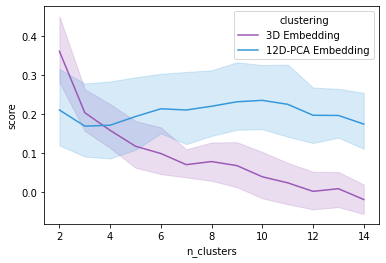

In [53]:
silo_scores=pd.concat((score_df,pca_score_df), ignore_index=True)

sns.lineplot(x='n_clusters', y='score', hue='clustering', data=silo_scores)


In [41]:

eigens=segmentation_control.pca_spectrum(dct,t_points, ts)
eigens_df=pd.DataFrame(eigens, columns=['case_name', 'variation', 'dimension', 'method'])

eigens_df.head()

,case_name,variation,dimension,method
0,21_LID,0.352798,0,12D-PCA Embedding
1,21_LID,0.235025,1,12D-PCA Embedding
2,21_LID,0.217176,2,12D-PCA Embedding
3,21_LID,0.126916,3,12D-PCA Embedding
4,21_LID,0.031399,4,12D-PCA Embedding


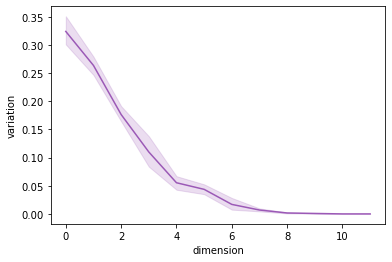

In [42]:
axs=sns.lineplot(x='dimension', y='variation', data=eigens_df)
ax=visual_config.sns_plots(self, ax, xlabel, ylabel, legend=False)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


ky=list(dct.keys())[0]
features=ts.pca_12D_srs(dct, ky, t_points)
pca = PCA()                                     #could  be optimized by n_comp
x = StandardScaler().fit_transform(features)
projected= pca.fit_transform(x)

colms=list(np.arange(0, features.shape[1]))



Text(0.5, 1.0, 'PCA Projected')

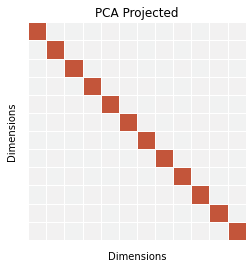

In [44]:

feat_corr = pd.DataFrame(data=features, columns=colms).corr()

reduced_corr = pd.DataFrame(data=projected, columns=colms).corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(feat_corr , dtype=bool))

fig, ax = plt.subplots(1,1)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(reduced_corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar=False, cbar_kws={"shrink": 0.8}, ax=ax)

ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('Dimensions')
ax.set_xlabel('Dimensions')
plt.title('PCA Projected')


Text(0.5, 1.0, 'Raw Data')

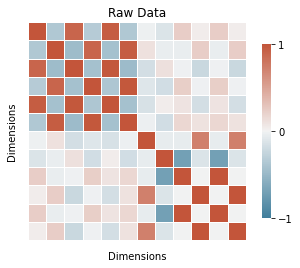

In [45]:

fig, ax = plt.subplots(1,1)

sns.heatmap(feat_corr,cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar=True, cbar_kws={"shrink": 0.8,"ticks":[-1,0,1] }, ax=ax)

ax.tick_params(bottom=False, top=False, left=False, right=False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_ylabel('Dimensions')
ax.set_xlabel('Dimensions')
plt.title('Raw Data')
